In [56]:
import cv2
import glob
import imutils
import numpy as np
from google.colab.patches import cv2_imshow

In [57]:
template_path = '/content/cod_logo.jpg'
images_path = '/content/cod_blackops.jpg'

In [58]:
template = cv2.imread(template_path, 0)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]

In [59]:
for imagePath in glob.glob(images_path):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None

    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        resized = imutils.resize(gray, width=int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)
    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

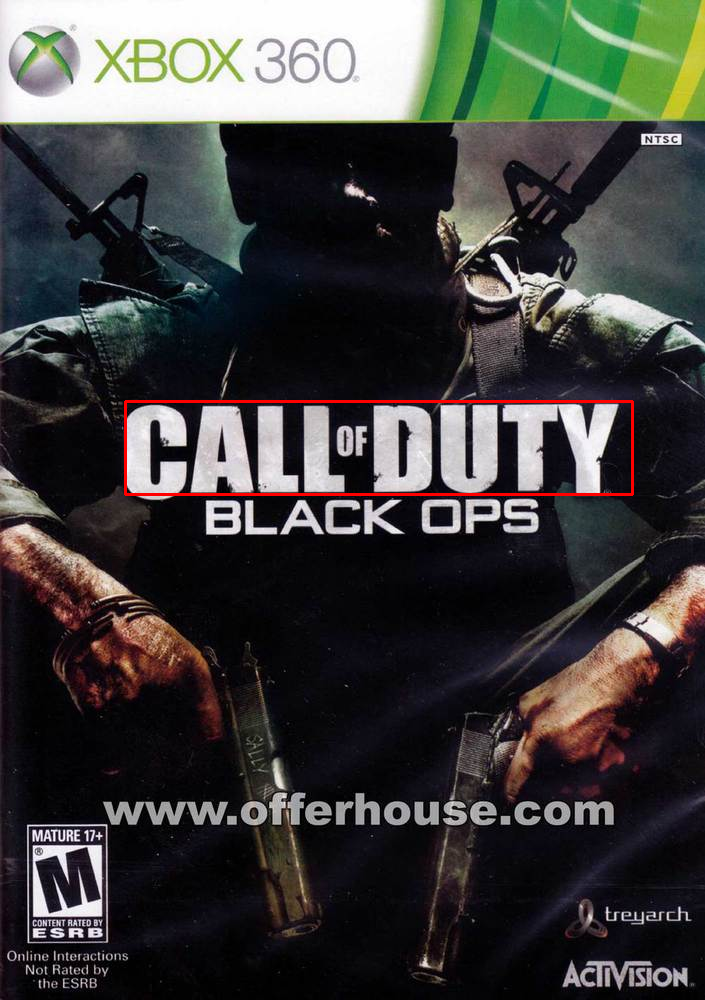

In [60]:
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
cv2_imshow(image)